<a href="https://colab.research.google.com/github/bandhannn/djs-compute-tasks/blob/main/NYC_traffic_accidents_EDA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NYC traffic accidents analysed.
Kaggle link: https://www.kaggle.com/datasets/mysarahmadbhat/nyc-traffic-accidents?select=NYC+Accidents+2020.csv


Data preparation & cleaning

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/NYC Accidents 2020.csv')

In [3]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON_STREET_NAME,CROSS_STREET_NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE_TYPE_CODE1,VEHICLE_TYPE_CODE2,VEHICLE_TYPE_CODE3,VEHICLE_TYPE_CODE4,VEHICLE_TYPE_CODE5
0,29-08-2020,15:40:00,BRONX,10466.0,40.892100,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,29-08-2020,21:00:00,BROOKLYN,11221.0,40.690500,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,29-08-2020,18:20:00,NaN,NaN,40.816500,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,29-08-2020,00:00:00,BRONX,10459.0,40.824720,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,29-08-2020,17:10:00,BROOKLYN,11203.0,40.649890,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74876,01-01-2020,15:13:00,BRONX,10459.0,40.826810,-73.896510,POINT (-73.89651 40.82681),NaN,NaN,1122 INTERVALE AVENUE,...,NaN,NaN,NaN,NaN,4268088,Sedan,NaN,NaN,NaN,NaN
74877,01-01-2020,08:00:00,BROOKLYN,11235.0,40.582935,-73.959210,POINT (-73.95921 40.582935),NaN,NaN,3401 GUIDER AVENUE,...,Unspecified,Unspecified,NaN,NaN,4267756,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
74878,01-01-2020,11:36:00,BRONX,10461.0,40.848553,-73.830055,POINT (-73.830055 40.848553),NaN,NaN,1810 MAHAN AVENUE,...,Unspecified,NaN,NaN,NaN,4269230,Sedan,Pick-up Truck,NaN,NaN,NaN
74879,01-01-2020,01:45:00,MANHATTAN,10017.0,40.753624,-73.969440,POINT (-73.96944 40.753624),EAST 48 STREET,2 AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4267482,Sedan,Taxi,NaN,NaN,NaN


understanding the data

In [4]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF STREET NAME', 'number_of_person_injured',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE1', 'VEHICLE_TYPE_CODE2',
       'VEHICLE_TYPE_CODE3', 'VEHICLE_TYPE_CODE4', 'VEHICLE_TYPE_CODE5'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON_STREET_NAME                 55444 non-null  object 
 8   CROSS_STREET_NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  number_of_person_injured       74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

In [6]:
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,number_of_person_injured,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,49134.000000,68935.000000,68935.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,7.488100e+04
mean,10913.681585,40.689825,-73.843376,0.366555,0.001923,0.054740,0.000748,0.043709,0.000120,0.268105,0.001055,4.305762e+06
std,515.069483,1.233368,2.234881,0.726178,0.047609,0.237582,0.027337,0.209737,0.010963,0.691423,0.037073,2.171658e+04
min,10000.000000,0.000000,-74.253006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.063247e+06
25%,10458.000000,40.667076,-73.958680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.287041e+06
50%,11210.000000,40.716885,-73.916850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.305812e+06
75%,11354.000000,40.789445,-73.862630,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.324545e+06
max,11697.000000,40.912884,0.000000,15.000000,4.000000,6.000000,1.000000,3.000000,1.000000,15.000000,4.000000,4.343622e+06


In [7]:
null_values=df.isna().sum().sort_values(ascending=False)
null_values

VEHICLE_TYPE_CODE5               74378
CONTRIBUTING FACTOR VEHICLE 5    74358
VEHICLE_TYPE_CODE4               73110
CONTRIBUTING FACTOR VEHICLE 4    73030
VEHICLE_TYPE_CODE3               68457
CONTRIBUTING FACTOR VEHICLE 3    68116
OFF STREET NAME                  55444
CROSS_STREET_NAME                39200
ZIP CODE                         25747
BOROUGH                          25741
VEHICLE_TYPE_CODE2               21243
ON_STREET_NAME                   19437
CONTRIBUTING FACTOR VEHICLE 2    15596
LOCATION                          5946
LONGITUDE                         5946
LATITUDE                          5946
VEHICLE_TYPE_CODE1                 635
CONTRIBUTING FACTOR VEHICLE 1      304
COLLISION_ID                         0
CRASH DATE                           0
NUMBER OF MOTORIST KILLED            0
NUMBER OF MOTORIST INJURED           0
NUMBER OF CYCLIST KILLED             0
CRASH TIME                           0
NUMBER OF PEDESTRIANS KILLED         0
NUMBER OF PEDESTRIANS INJ

<Axes: >

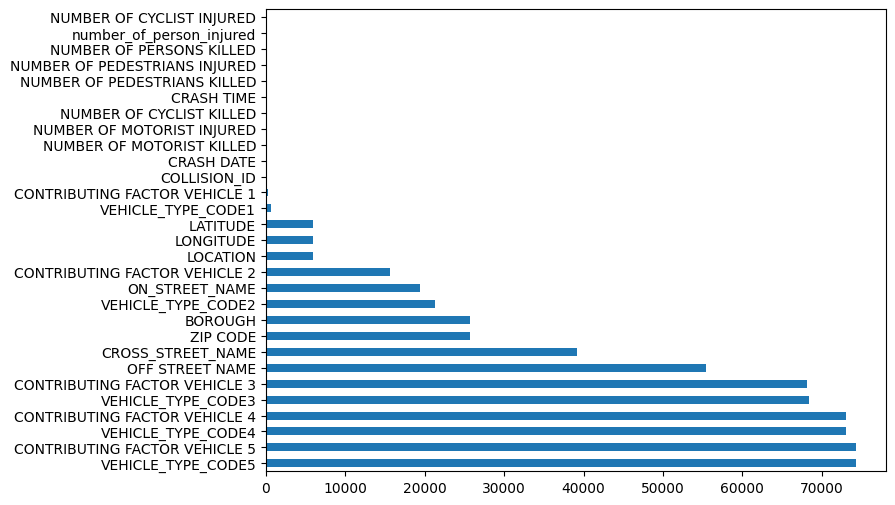

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
null_values.plot(kind='barh')


**Exploratory analysis & visualization**



columns in use:
CRASH DATE', 'CRASH TIME','LATITUDE',
       'LONGITUDE',number_of_person_injured,BOROUGH,CROSS_STREET_NAME,'VEHICLE_TYPE_CODE1', 'VEHICLE_TYPE_CODE2',
       'VEHICLE_TYPE_CODE3', 'VEHICLE_TYPE_CODE4', 'VEHICLE_TYPE_CODE5'.

In [9]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME',
       'OFF STREET NAME', 'number_of_person_injured',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE_TYPE_CODE1', 'VEHICLE_TYPE_CODE2',
       'VEHICLE_TYPE_CODE3', 'VEHICLE_TYPE_CODE4', 'VEHICLE_TYPE_CODE5'],
      dtype='object')

In [10]:
df.BOROUGH.dropna()


0            BRONX
1         BROOKLYN
3            BRONX
4         BROOKLYN
6            BRONX
           ...    
74876        BRONX
74877     BROOKLYN
74878        BRONX
74879    MANHATTAN
74880       QUEENS
Name: BOROUGH, Length: 49140, dtype: object

In [11]:
num_accidents_borough=df.BOROUGH.value_counts(ascending=False)
num_accidents_borough

BROOKLYN         16907
QUEENS           14017
BRONX             9417
MANHATTAN         7353
STATEN ISLAND     1446
Name: BOROUGH, dtype: int64

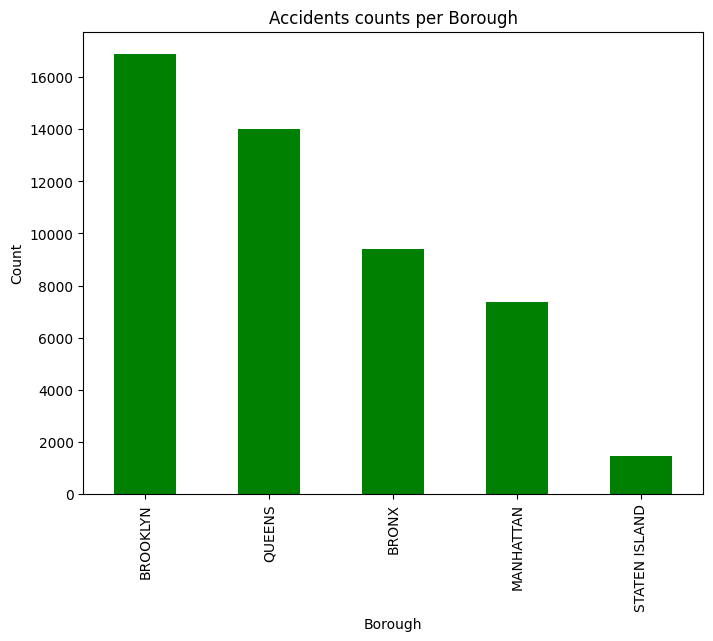

In [12]:
#displaying with a bargraph
plt.figure(figsize=(8, 6))
num_accidents_borough.plot(kind='bar', color='green')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Accidents counts per Borough')
plt.show()

**Conclusion**: Thus most accidents occur in Brooklyn

Scatterplot

Text(0.5, 1.0, 'NYC Crash Density By Borough')

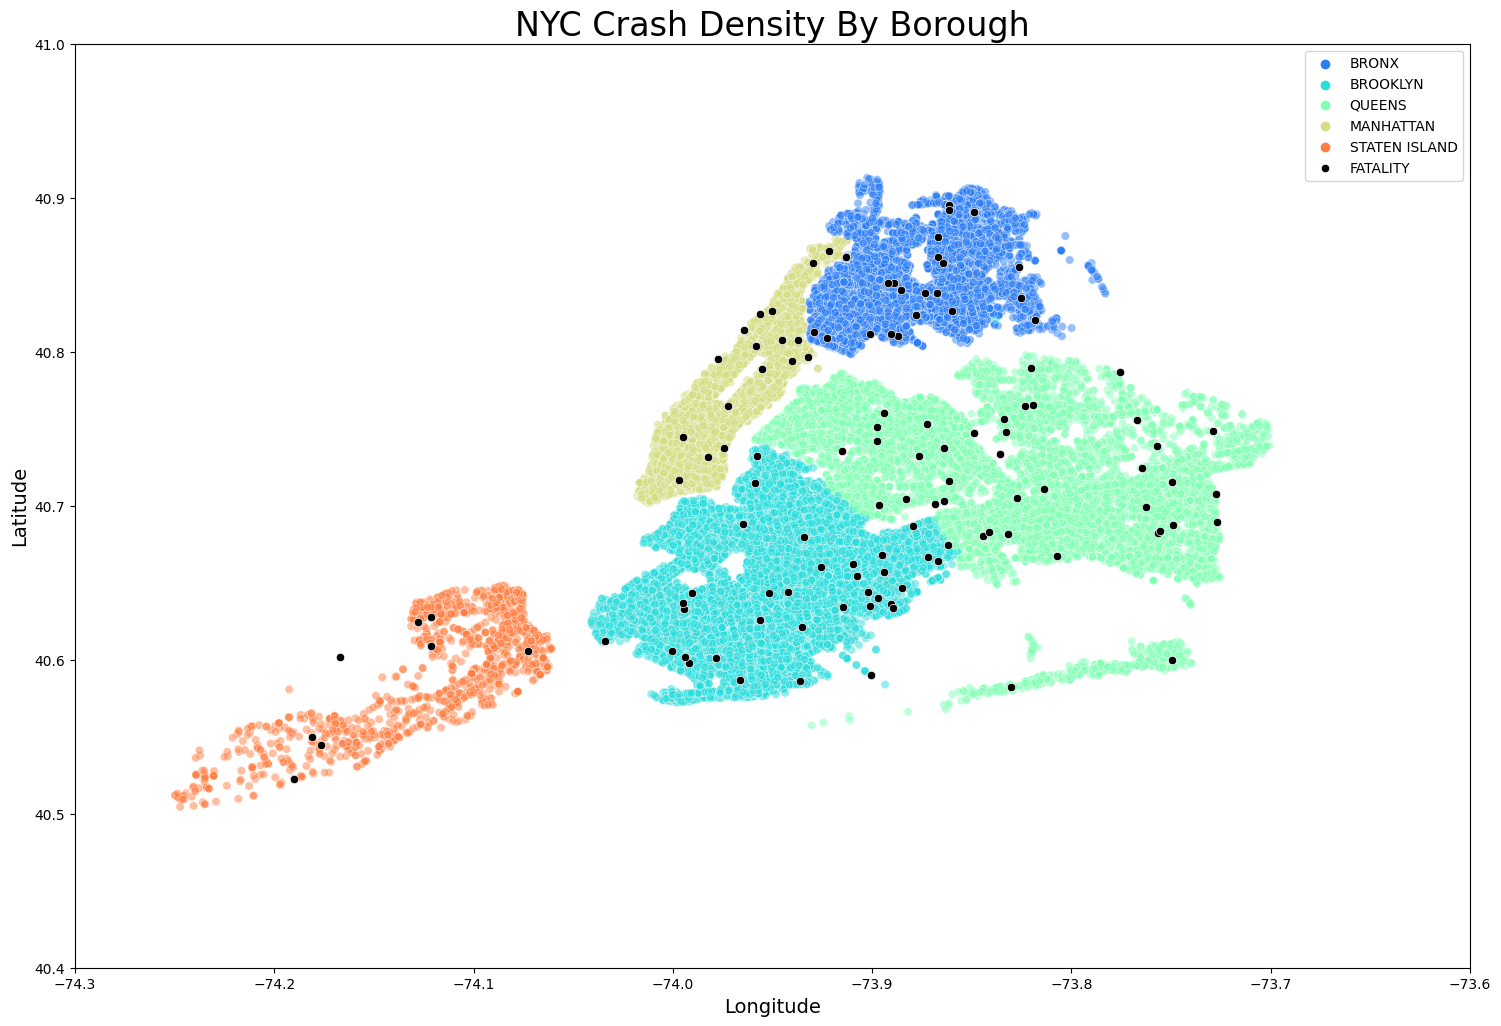

In [16]:
import seaborn as sns
plt.figure(figsize=(18,12))

sns.scatterplot(x="LONGITUDE",y="LATITUDE",data=df,hue="BOROUGH",palette="rainbow",
               alpha=0.5)
plt.ylim(40.4,41)
plt.xlim(-74.3,-73.6)
plt.ylabel("Latitude",fontsize=14)
plt.xlabel("Longitude",fontsize=14)

sns.scatterplot(x="LONGITUDE",y="LATITUDE",data=df[df["NUMBER OF PERSONS KILLED"]>0],color="black",label="FATALITY")
plt.title("NYC Crash Density By Borough",fontsize=24)

some more insights

In [13]:
#maximum number of persons injured
df.number_of_person_injured.idxmax()

4635

In [22]:
df['LOCATION'].value_counts()

POINT (-73.91282 40.861862)     80
POINT (0 0)                     63
POINT (-73.89083 40.820305)     41
POINT (-73.91243 40.8047)       40
POINT (-73.86536 40.651863)     38
                                ..
POINT (-73.848816 40.72399)      1
POINT (-73.992645 40.578117)     1
POINT (-73.99862 40.732212)      1
POINT (-73.87268 40.718525)      1
POINT (-73.83096 40.726875)      1
Name: LOCATION, Length: 36749, dtype: int64

In [20]:
#What are the leading causes of crashes in NYC?
causes_acc= pd.DataFrame(df.groupby("CONTRIBUTING FACTOR VEHICLE 1")["number_of_person_injured"].count().sort_values(ascending=False))
causes_acc.columns=["Number of Crashes"]
causes_acc.head(10)

,Number of Crashes
CONTRIBUTING FACTOR VEHICLE 1,
Unspecified,19471
Driver Inattention/Distraction,19123
Following Too Closely,5202
Failure to Yield Right-of-Way,4815
Passing or Lane Usage Improper,2840
Backing Unsafely,2829
Passing Too Closely,2687
Other Vehicular,2233
Unsafe Speed,2015


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Number of Crashes'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['Number of Crashes'], **{})
chart

In [24]:
#What factors in a crash are most likely to result in death?
pd.DataFrame(df[df["NUMBER OF PERSONS KILLED"] > 0].groupby("CONTRIBUTING FACTOR VEHICLE 1").size().sort_values(ascending=False).head(),columns=["Count"])

,Count
CONTRIBUTING FACTOR VEHICLE 1,
Unsafe Speed,33
Unspecified,32
Traffic Control Disregarded,15
Driver Inattention/Distraction,13
Failure to Yield Right-of-Way,10
